# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
    
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_density_profile (electrons)': 1., 
'use_xout_in_density_profile_from_enclosed_mass': 1,
'normalize_gas_density_profile': 0, # only useful when we dont set xout_in_density_profile_from_enclosed_mass, e.g., computing the transform as in Cayuso et al 2021 
    
# 'ksz template file': path_to_kSZ2X_2022+'external_data/dl_ksz_hm_agn_1p2h_uK2_170422.txt',
# 'ksz template file, reio contribution': path_to_kSZ2X_2022+'external_data/dl_ksz_hm_agn_1p2h_uK2_170422_zeros.txt',

# for the truncation of the pressure profile important!
'x_outSZ': 4.,
'truncate_wrt_rvir':0,
}

Metal device set to: Apple M1 Pro


2023-03-25 12:19:46.428177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-25 12:19:46.428314: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## The power spectrum

In [4]:
%%time
z_for_pk_hm = 1.

M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',
'gas profile':'B16',
'gas profile mode' : 'shock',

'use_fft_for_profiles_transform':1,
'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    


"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})



M.compute_class_szfast()
pk_at_z_hm = M.pk_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()


M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',
    
'gas profile':'B16',
'gas profile mode' : 'shock',


'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'hm_consistency' : 0,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})



M.compute_class_szfast()
pk_at_z_hm_no_consistency = M.pk_at_z_hm()

M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',
'gas profile':'B16',
'gas profile mode' : 'agn',
'use_fft_for_profiles_transform':1,

'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'non_linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})
M.compute_class_szfast()
pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()

M = Class()
# M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set({

'output': 'mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',

'gas profile':'nfw',


'x_out_truncated_density_profile (electrons)': 1., 
'use_fft_for_profiles_transform':1,
    


"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})

M.compute_class_szfast()

pk_bb_at_z_hm_nfw = M.pk_bb_at_z_hm()

CPU times: user 6min 14s, sys: 4.79 s, total: 6min 19s
Wall time: 41.3 s


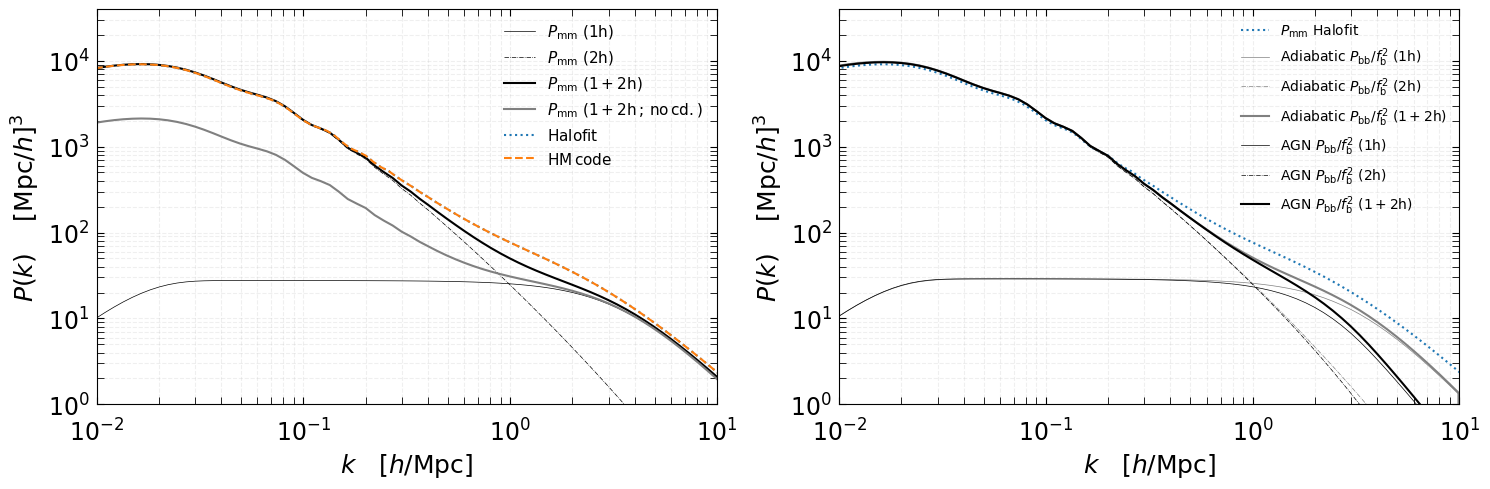

In [5]:
k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e0,4e4)
ax.set_xlim(1e-2,1e1)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h)}$',c='k',ls='-')

ax.plot(pk_at_z_hm_no_consistency['k'],np.asarray(pk_at_z_hm_no_consistency['2h'])+np.asarray(pk_at_z_hm_no_consistency['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h\,;\,no\,cd.)}$',c='grey',ls='-')

ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{Halofit}$',ls=':')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{HM\,code}$',ls='--')


ax.legend(fontsize=11,ncol=1,frameon=False)




ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e0,4e4)
ax.set_xlim(1e-2,1e1)


ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ $\mathrm{Halofit}$',ls=':')

ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='grey',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='grey',ls='-.',lw=0.5)

ax.plot(pk_bb_at_z_hm_shock['k'],(np.asarray(pk_bb_at_z_hm_shock['1h'])+np.asarray(pk_bb_at_z_hm_shock['2h']))*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='grey',ls='-')



ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],(np.asarray(pk_bb_at_z_hm_agn['1h'])+np.asarray(pk_bb_at_z_hm_agn['2h']))*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='k',ls='-')




ax.legend(fontsize=10,ncol=1,frameon=False)

fig.tight_layout()